## Introduction

All of our previous analysis of tweets relating to school shootings have been limited to tweets containing hashtags. We operated under the assumption that a hashtag could act as a proxy for a label by grouping hashtags commonly associated with news tweets and grouping hashtags commonly associated with tweets expressing opinions. Clearly this approach has several shortcomings--most notably the lack of practical significance.  
  
In this analysis, we will perform clustering to identify groups in the tweets that hopefully transcend the less-interesting binary classification of tweets as being news-oriented or opinion-oriented. We expect that our clustering analysis will split tweets by their emotional sentiment (perhaps empathetic/critical) or by their political orientation (tighter gun laws / looser gun laws).

## Theory

Clustering is a field of unsupervised machine learning that groups observations in data based on how closely they are located to each other. As a brief introduction, we discuss a few different clustering techniques below:  

### K-Means
Not to be confused with K Nearest Neighbors, K-Means is a clustering algorithm that accepts a parameter $K$ determining the number of clusters to identify in the data. For each cluster, a centroid is determined which serves as the arbitrary center of the cluster. The centroid can be calculated using mean, median, or other metrics to determine the center of the observations.  

The algorithm begins by selecting K random arbitrary centroids in the space. From there, it iteratively updates to represent the optimal center for K clusters in the dataset based on some distance metric (usually Euclidean distance). Once the iterations no longer update the centroids, the centroids are considered to have converged.

K-Means clustering is ideal for clustering data that follow a Gaussian distribution. Gaussian distributions appear as a circle or oval in 2-dimensional space and as spherical or ovaline clouds in 3-dimensional space. Dimensions greater than three can be difficult to visualize, so often the best approach for determining the optimal clustering algorithm is to try multiple ones.

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
DBSCAN is an alternative clustering algorithm that is based on grouping observations by their density. In this case, density refers to the concentration of observations in a relatively small area of the space. In DBSCAN, outliers are omitted from clusters because they are, by definition, isolated from high-density clusters of data.

The fundamental difference between DBSCAN and K-Means is that DBSCAN is very good at identifying clusters of data that are not linear / do not follow a Gaussian distribution. Consider the graphic below, published by Scikit Learn, illustrating the results of various clustering algorithms on toy datasets of different shapes.

!["https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html"](./../../501-project-website/images/clustering/scikit-learn_clustering.png)

As we can see, DBSCAN is much better at clustering irregular shapes than K-Means.

### Hierarchical Clustering
Hierarchical clustering, unlike the clustering algorithms defined above (which are considered partitional clustering algorithms), is an approach to clustering that assigns data to different "sub-clusters" at different levels of the hierarchy. For example, at the highest levels, the data are separated into few clusters, but the clusters are large. At the lower levels of the hierarchy, the clusters get smaller but are more plentiful.

Oftentimes, the size and number of clusters at each hierarchy can effectively be illustrated in a dendrogram. This approach allows the user to determine the optimal number/size of clusters "at a glance"--depending on the use case of the analysis.

## Methods

### Data Selection

Because we do not consider any labels in clustering, we are free to use the entire set of tweets in this analysis. Using [this]("https://github.com/anly501/anly-501-project-joshegladwell/blob/main/codes/07-clustering/bow_generator.py") Python script, we attempt to create a bag of words model for a random selection of 50,000 tweets (rather than only tweets with hashtags). However, due to computing limitations we will settle for the same BOW model that we have used in our previous analyses.

In [1]:
import pandas as pd
import numpy as np
import json


# Read in data
df_train = pd.read_csv('./../../../large_data/03-classification-model-data/Twitter/df_train.tsv', sep='\t')
df_test = pd.read_csv('./../../../large_data/03-classification-model-data/Twitter/df_test.tsv', sep='\t')

bow_train = np.array(pd.read_csv('./../../../large_data/03-classification-model-data/Twitter/bow_train.csv'))
bow_test = np.array(pd.read_csv('./../../../large_data/03-classification-model-data/Twitter/bow_test.csv'))

vocab_train = json.load(open('./../../../large_data/03-classification-model-data/Twitter/vocab_train.json'))

In [2]:
# Concatenate the train and test sets
df = pd.concat([df_train, df_test])
print(df_train.shape)
print(df_test.shape)
print(df.shape)

bow = np.concatenate((bow_train, bow_test))
print(bow_train.shape)
print(bow_test.shape)
print(bow.shape)

(31524, 4)
(7881, 4)
(39405, 4)
(31524, 28955)
(7881, 28955)
(39405, 28955)


In [3]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from statistics import mode
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [4]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
distortions = []
inertias = []
k = 11

for k in range(1, k):
    print("K=",k)
    kmeanModel = KMeans(n_clusters=k, init='k-means++')
    kmeanModel.fit(bow)

    distortions.append(sum(np.min(cdist(bow, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / bow.shape[0])
    inertias.append(kmeanModel.inertia_)

evaluation = pd.DataFrame.from_records({'Cluster': np.arange(1, k+1), 'Distortion': distortions, 'Inertia': inertias})

K= 1
K= 2
K= 3
K= 4
K= 5
K= 6
K= 7
K= 8
K= 9
K= 10


In [5]:
evaluation

,Cluster,Distortion,Inertia
0,1,3.646307,562647.052709
1,2,3.595482,548418.377441
2,3,3.557748,540261.672161
3,4,3.545780,533720.096051
4,5,3.506204,525580.956160
5,6,3.494566,519912.986393
6,7,3.450392,510538.021121
7,8,3.457314,510361.720756
8,9,3.435699,507861.448645
9,10,3.425397,504381.136456


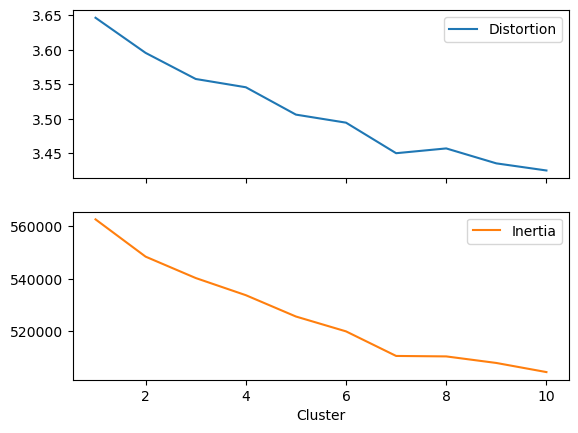

In [9]:
import matplotlib.pyplot as plt

evaluation.plot.line(x="Cluster", subplots=True)

plt.savefig('./../../501-project-website/images/clustering/elbow-graph.png')

### Hyper-Parameter Tuning

### Final Results

## Results

## Conclusions

## References